<a id="top"></a>
# Leavitt's Footsteps: Solutions
***

## Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut

import lightkurve as lk

Observations.enable_cloud_dataset()

INFO: Using the S3 STScI public dataset [astroquery.mast.cloud]


## Exercise 1: 

Describe the image that you see. Why are there multiple bright regions?

**Answer:** Each of the bright regions are individual stars. Each star's light is "spread out" over multiple pixels. There are appear to be two main bright stars, and likely two other stars on the right edge and top edge.

## Exercise 2:
What is the name for the star on the left, and what is the name for the star on the right? 

In [3]:
# First, we need to recreate some of the variables from the original notebook here in the solutions notebook.
radSearch = 2/60 #radius in degrees
ra1=001.50821
dec1=-36.90425
coordstring=str(ra1)+' '+str(dec1)
catalog_TIC = Catalogs.query_object(coordstring, radius = radSearch, catalog = "TIC")
bright = catalog_TIC['Tmag'] < 16 
TICbright=catalog_TIC[bright]

In [4]:
# Solution:
# The parallax angle is from the Gaia data, so let's examine that.
TICbright['ra','dec','GAIA','ID']
# There are many ways to figure out which is which.
# One method is to notice from the figure (in the notebook) that the star on the left 
# has the least negative Declination and the most positive RA.
# Therefore it is GAIA 2309230918072192512
# The star closet to the middle has the next most negative Declination and next most positive RA.
# Therefore it is GAIA 2309225008197193856, TIC 120488286
# Additionally, we could notice that the last column of the two catalog tables 
# tells us the distance from the search from coordinate and the tables
# are automatically ordered by lowest to largest distance;
# so the stars we were asked about should be the third and first 
# in the default table order, respectively.

ra,dec,GAIA,ID
float64,float64,str19,str9
1.50815926825826,-36.9041890229087,2309225008197193856,120488286
1.49928341095074,-36.9129396742459,2309225008197194368,120488285
1.526843917294,-36.8923236406745,2309230918072192512,120488287
1.48747585028645,-36.9275920019391,2309224973837456512,120461434


## Exercise 3:

How many different stars are included in the first light curve you are shown? Which of those stars has the unique variability that drew the attention of your colleague? 

In [1]:
# By default, the aperture mask (shown in white-outlined pixels on the right hand side)
# appears to capture at least 3 bright stars. From the GAIA catalog data we first plotted,
# there may also be at least three other dim stars captured in the aperture.
# It is the one in the middle of the three that is the one with the unique variability.
# (The two periods of dimness followed by a rise seem to be systematic to the instrument, 
# because they appear in every pixel.)

## Exercise 4
Describe the shape of the variability of this star in words. Is it symmetric? What is the approximate period?

In [5]:
# It doesn't look symmetric; the flux rises quickly but drops more slowly. 
# Based on the tick marks, the period appears to be a bit less than a day.
# There seem to be about 6 oscillations per 5 days, so perhaps the period is about 0.8 days.

## Exercise 5
What if the period were off by 1% in the other direction (period=1.01 x period we found); what would that plot look like?

In [7]:
# First, we need to recreate some of the variables from the original notebook here in the solutions notebook.
tesslc = lk.io.read('TESS_TIC120488286_custom-lc.fits')
pgrm=tesslc.to_periodogram()
period = pgrm.period_at_max_power

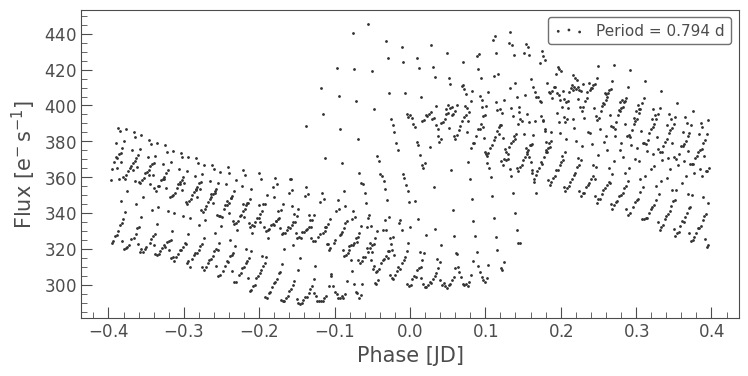

In [9]:
# Solution
period3=period*1.01
tesslc.fold(period3).scatter(label=f'Period = {period3.value:.3f} d');

## Exercise 6
Write an short email with the update you would give your colleague at this point, summarizing your results thus far. Include at least 2 concerns you still have about the data and/or results, and how someone could address them.

In [3]:
# Answers may vary.
# Concerns may include the varying flux levels (e.g. the dots in the 
# periodogram seem timed correctly, but do not align vertically). 
# This could be solved by background-subtraction of the light curve, 
# as this  may be an instrumental effect.

## Exercise 7
Write a loop that will do the following for each star in ``ticlist``:
- Search for and download a lightcurve using ``lightkurve``. For now, if multiple lightcurves are returned from ``search_lightcurve``, just use the first one.
- Compute the periodogram and plot the folded light curve.
- Append the period at maximum power to the array named ``periods``, defined below.

Finally, review the output to determine which of the 14 stars have qualitiatively similar light curves to the first one you studied.

Note that at the time of the writing of this tutorial, some of the lightcurves you download will be normalized by default, and some will not. This doesn't affect your ability to calculate the period and assess the shape of the light curve.

In [11]:
# First, we need to recreate some of the variables from the original notebook here in the solutions notebook.
ticlist=['TIC270621410', 'TIC8999323', 'TIC439399635', 
         'TIC261745002', 'TIC279737991', 'TIC234507163',
         'TIC293526535', 'TIC325490196', 
         'TIC182729973','TIC144046456',
         'TIC120565065','TIC219316485', 'TIC149664951']

0 0.6160844489938412
1 0.5537245588590467
2 0.6063268326833051
3 0.34852319084571537
4 0.4917614460361833
5 0.41419113165422866
6 0.550060517585562
7 0.5680185786704803
8 3.4791593857152634
9 139.1669003941695
10 0.18211839077183506
11 0.36788349475201926
12 0.16930312081522095
[0.6160844489938412, 0.5537245588590467, 0.6063268326833051, 0.34852319084571537, 0.4917614460361833, 0.41419113165422866, 0.550060517585562, 0.5680185786704803, 3.4791593857152634, 139.1669003941695, 0.18211839077183506, 0.36788349475201926, 0.16930312081522095]


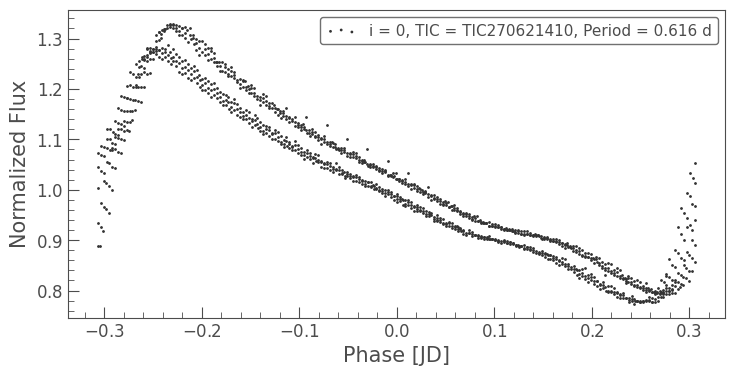

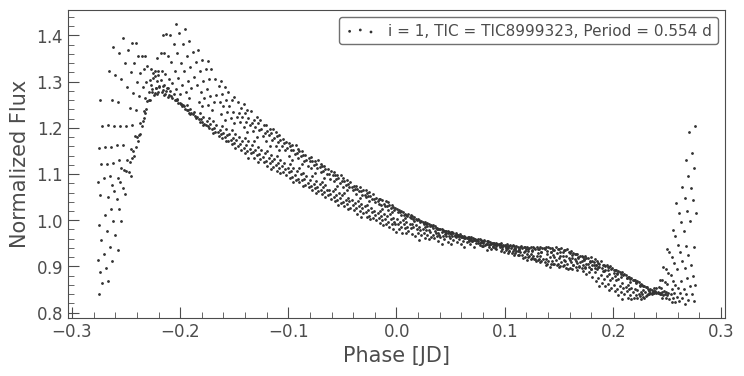

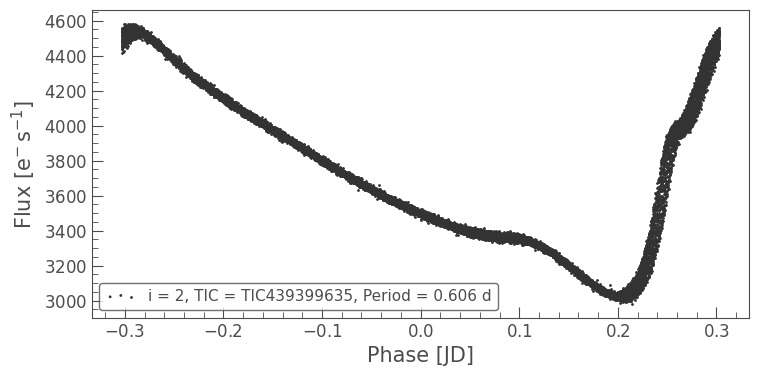

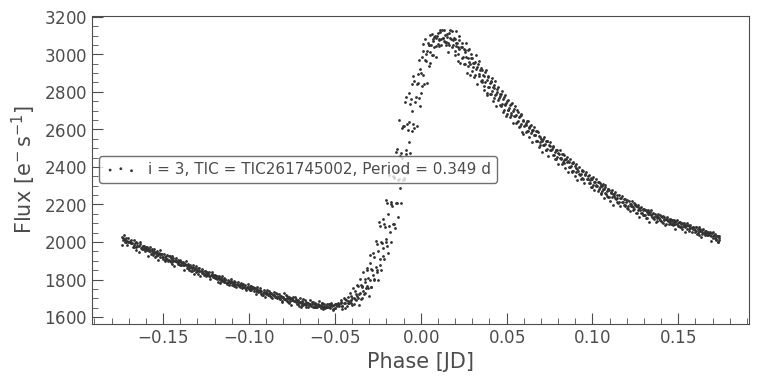

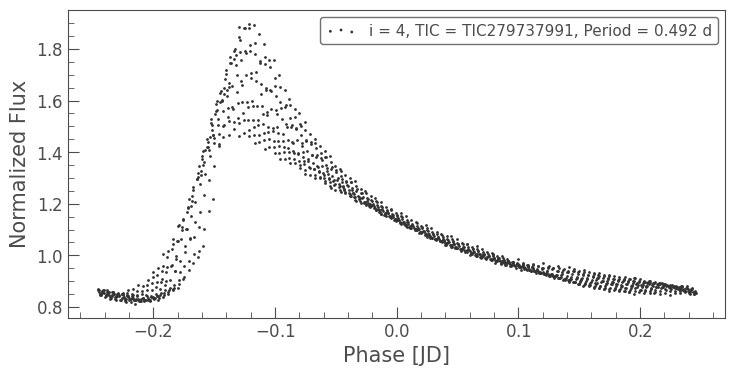

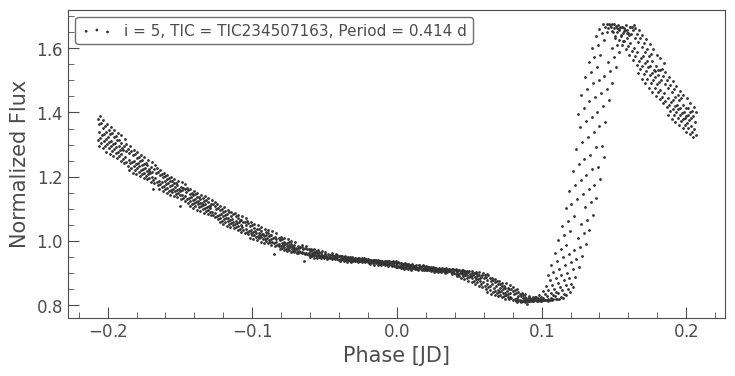

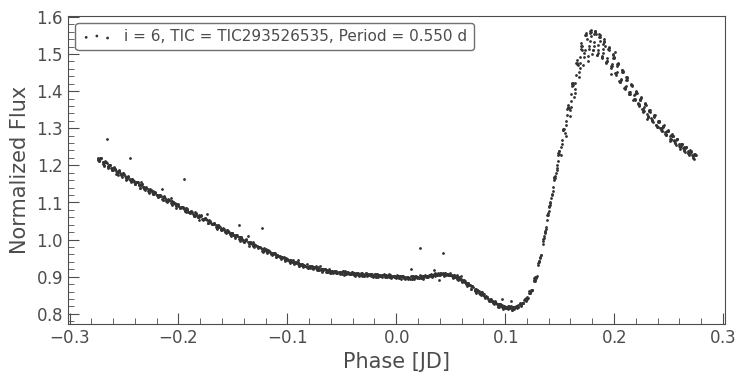

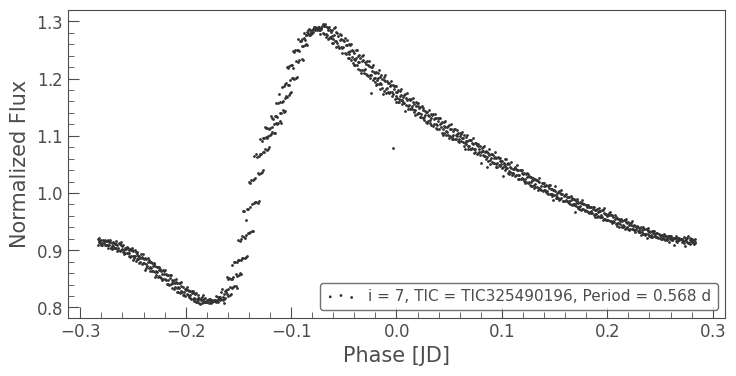

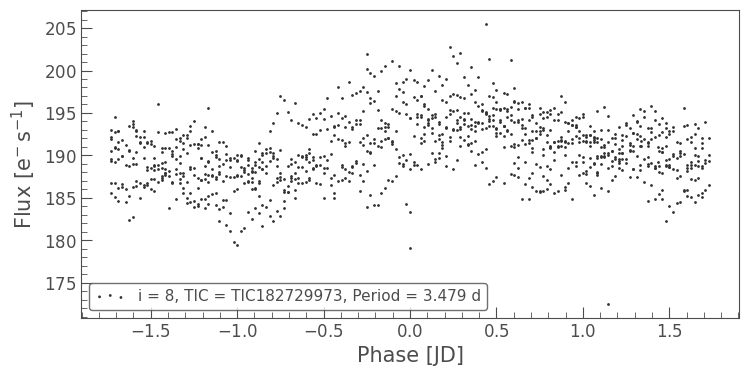

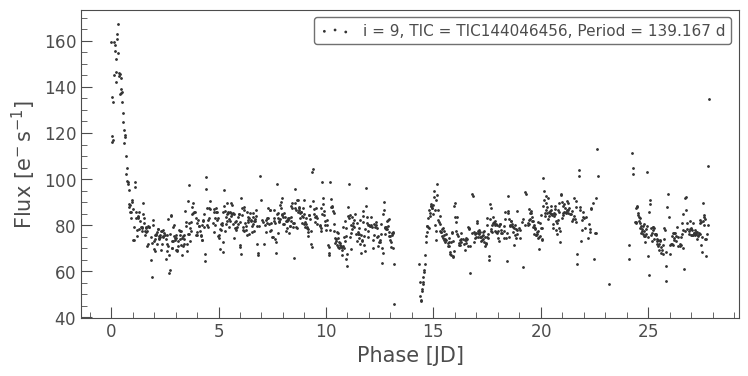

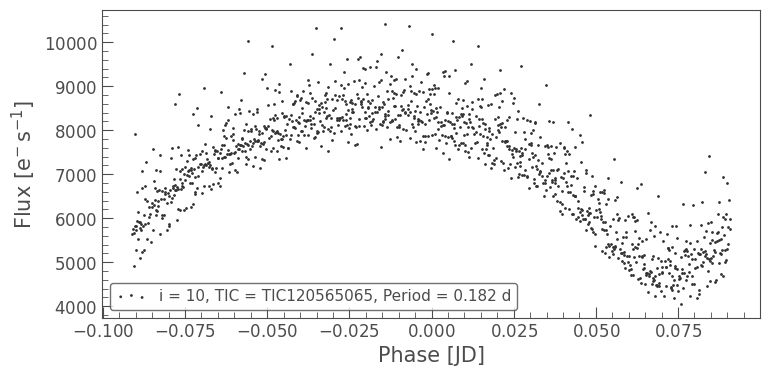

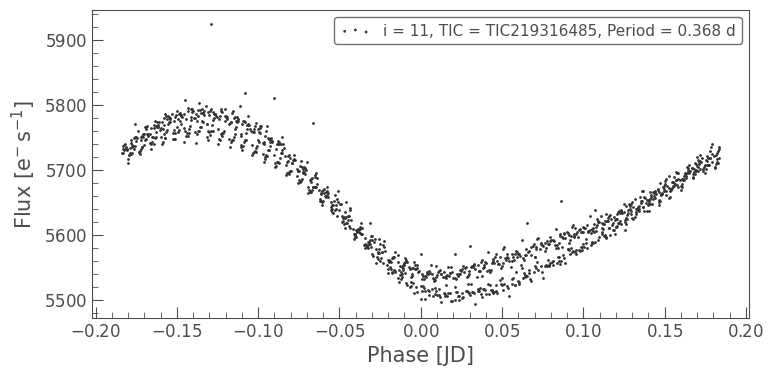

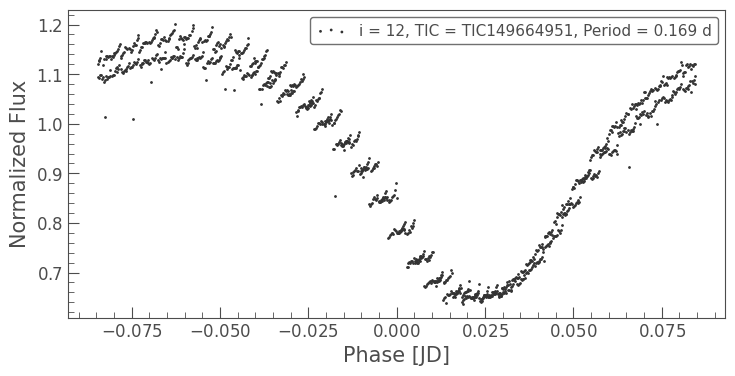

In [12]:
periods=[]
### Write your code for Exercise 7 here
for i in range(len(ticlist)):
    obs=lk.search_lightcurve(ticlist[i])
    tesslc=obs[0].download()
    #tesslc.plot()
    pgrm=tesslc.to_periodogram()
    #pgrm.plot()
    p=pgrm.period_at_max_power
    tesslc.fold(p).scatter(label='i = '+str(i)+', TIC = '+ticlist[i]+f', Period = {p.value:.3f} d');
    print(i,(p.value))
    periods.append(p.value)
print(periods)
# The first 8 in the list appear to be qualitiatively similar to our first star, 
# because they have periods just under a day and are characterized by a 
# steep rise and a slow decay in flux. Don't be mislead by where the rise happens 
# in the folded light curve; this is an arbitrary choice on where to count phase = 0. 
# The next two seem inconclusive; it is possible we could try to clean up the data
# or use another sector's data to create a better periodogram.
# The final three have periods that are around the right order of magnitude, though a bit
# smaller. However, their shape is noticeably different; the rise and fall of the 
# flux are more symmetric, almost sinusoidal in shape. This is likely a different phenomenon, 
# such as stellar rotation.

## Exercise 8: Period versus Luminosity with Error Bars

Recreate the period-luminosity plot, including the error bars on the total luminosity from the Gaia catalog. 

In [26]:
# First, we need to recreate some of the variables from the original notebook here in the solutions notebook.
catalog_Gaia2=Table.read('catalog_Gaia2.dat',format='ascii')
catalog_Gaia2=catalog_Gaia2[0:7]
periods=[0.6160844489938412,0.5537245588590467,0.6063268326833051,0.34852319084571537,0.4917614460361833,0.41419113165422866,0.550060517585562]

Text(0, 0.5, 'Solar Luminosities')

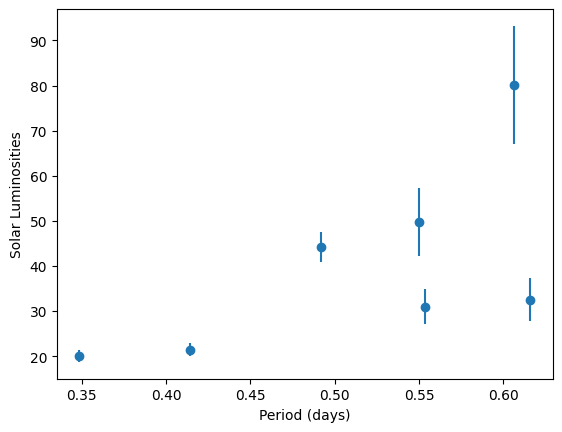

In [30]:
# Solution
err_low=catalog_Gaia2['lum_val']-catalog_Gaia2['lum_percentile_lower']
err_high=catalog_Gaia2['lum_percentile_upper']-catalog_Gaia2['lum_val']
plt.errorbar(periods, catalog_Gaia2['lum_val'],yerr=[err_low,err_high],fmt='o')
plt.xlabel('Period (days)')
plt.ylabel('Solar Luminosities')

## Exercise 9: Period versus Absolute Magnitudes.

To plot absolute magnitude in each of the three Gaia bands vs. period, do the following:
- Use the parallax angle (remember, it's in milliarcseconds!) to find the distance to the stars.
- Use the distance modulus formula to compute the absolute magnitude in each band. 
- Plot each absolute magnitude vs. period.

Do any of the bands hint at a better defined relationship than period-luminosity? Do the trends you see make sense? Find the line of best fit for the rp band. The [simple example](https://docs.astropy.org/en/stable/modeling/#a-simple-example) from the astropy.modeling docs may help.

This exercise assumes familiarity with stellar parallax and the stellar magnitude system.

In [53]:
# Parallax angle can be used to find distance, 
# where distance (in parsecs) is 1/stellar parallax (in arcseconds).
# Note that the "distance" column was not from the Gaia catalog; it is the distance
# from our search coordinate. 
catalog_Gaia2['d']=1/(catalog_Gaia2['parallax']*1e-3)
# The distance modulus formula is:
# m - M = 5 log_10(d)-5, where d is the distance in parsecs.
# Solve for M, m +5 - 5log_10(d) = M.
catalog_Gaia2['M_g']=catalog_Gaia2['phot_g_mean_mag']+5.0-5.0*np.log10(catalog_Gaia2['d'])
catalog_Gaia2['M_bp']=catalog_Gaia2['phot_bp_mean_mag']+5.0-5.0*np.log10(catalog_Gaia2['d'])
catalog_Gaia2['M_rp']=catalog_Gaia2['phot_rp_mean_mag']+5.0-5.0*np.log10(catalog_Gaia2['d'])

Text(0, 0.5, 'M_g')

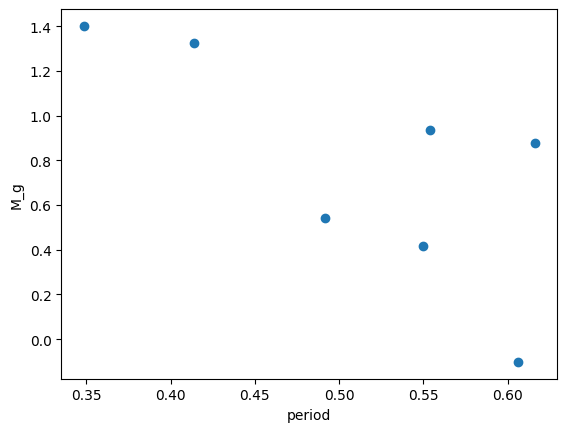

In [62]:
plt.plot(periods,catalog_Gaia2['M_g'],'o')
plt.xlabel('period')
plt.ylabel('M_g')

Text(0, 0.5, 'M_bp')

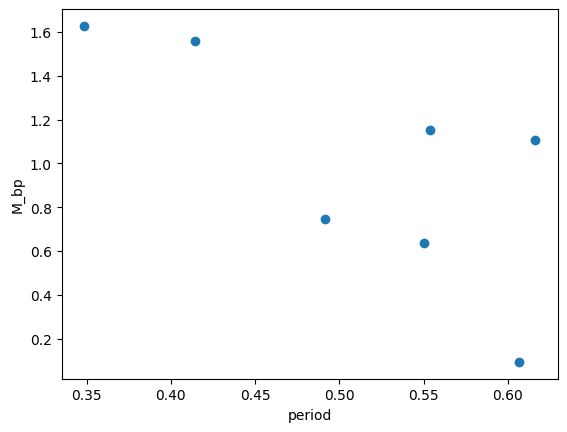

In [64]:
plt.plot(periods,catalog_Gaia2['M_bp'],'o')
plt.xlabel('period')
plt.ylabel('M_bp')

Text(0, 0.5, 'M_rp')

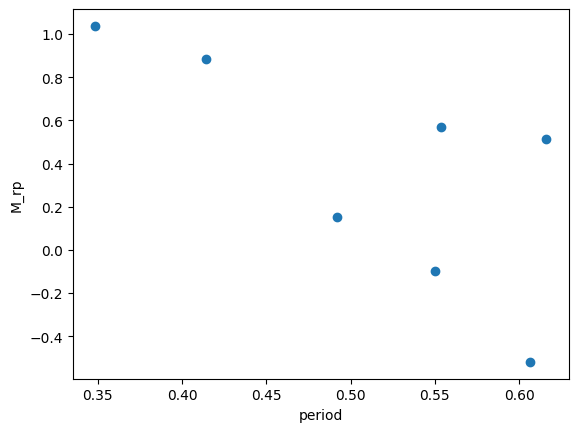

In [63]:
plt.plot(periods,catalog_Gaia2['M_rp'],'o')
plt.xlabel('period')
plt.ylabel('M_rp')

In [65]:
# Remember, the magnitude system is reversed! 
# The brightest stars are in the bottom of the plot;
# this is the same trend as in the period-luminosity plot
# (longer periods -> instrinsically brighter)

In [66]:
# https://docs.astropy.org/en/stable/modeling/
from astropy.modeling import models, fitting
#line_orig = models.Linear1D(slope=1.0, intercept=0.5)
fit = fitting.LinearLSQFitter()
line_init = models.Linear1D()
fitted_line = fit(line_init, periods, catalog_Gaia2['M_rp'])

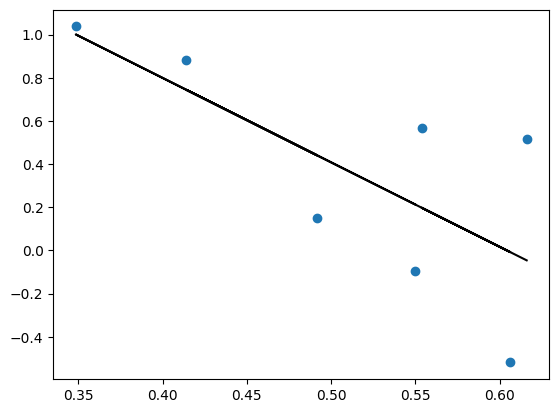

In [67]:
plt.plot(periods,catalog_Gaia2['M_rp'],'o')
plt.plot(periods,fitted_line(periods),'k-',label='Fitted Model')

## Exercise 10: Reversing the Relation

Another one of your colleagues has found another one of these stars; they found a period of 0.45 days and an apparent magnitude in the rp band of 13. Use your line of best fit from Exercise 9 to find the distance to this star. 

In [75]:
# First, use to the line of best fit to relate the period to an absolute magnitude.
M_rp=fitted_line(0.45)
print(M_rp)
# Then use the distance modulus formula, solved for d in parsecs.
# 10^[(m - M + 5)/5] = d
d=10.0**((13.0-M_rp+5.0)/5.0)
print(d)
# The star is 3000 parsecs away. 

0.6041265783369465
3014.218175924827


## Exercise 11: Comparison to the Literature

Similar work was published in [Molnár et. al. 2022](https://ui.adsabs.harvard.edu/abs/2022ApJS..258....8M/abstract). Read that paper and write a 1 paragraph summary of the methods and a 1 paragraph summary of the results. List five similarities and five differences between what they did and the analysis you did. 

In [76]:
# Answers will vary